In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import v_measure_score

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
X = PCA(n_components=2).fit_transform(train_data)
fig = plt.figure(figsize=(24,24))


<Figure size 1728x1728 with 0 Axes>

In [36]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
ax = fig.add_subplot(221)
ax.set_title("Clustering on 2dim PCA")
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
print("CLustering on PCA:",v_measure_score(train_labels,kmeans.labels_))

CLustering on PCA: 0.3589359557623006


In [37]:
#first cluster then PCA to plot
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data)
X = PCA(n_components=2).fit_transform(train_data)
ax = fig.add_subplot(222)
ax.set_title("Clustering on 784dim no PCA")
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
print("CLustering on 784 dim:",v_measure_score(train_labels,kmeans.labels_))

CLustering on 784 dim: 0.46876365126494585


In [38]:
ax = fig.add_subplot(223)
ax.set_title("Ground Truth 2dim PCA")
ax.scatter(X[:,0],X[:,1],c=train_labels)

In [39]:
# find classwise mean
indices = np.argsort(train_labels)
X_sorted = X[indices]
means = np.empty([10,2])
for i in range(10):
    means[i]=np.mean(X_sorted[100*i:100*(i+1),:])
kmeans = KMeans(n_clusters=10, init=means).fit(X)
ax = fig.add_subplot(224)
ax.set_title("Initializing with GT")
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
print("Initializing with GT:",v_measure_score(train_labels,kmeans.labels_))

Initializing with GT: 0.36681811526570174


/home/masterg/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [40]:
plt.show()

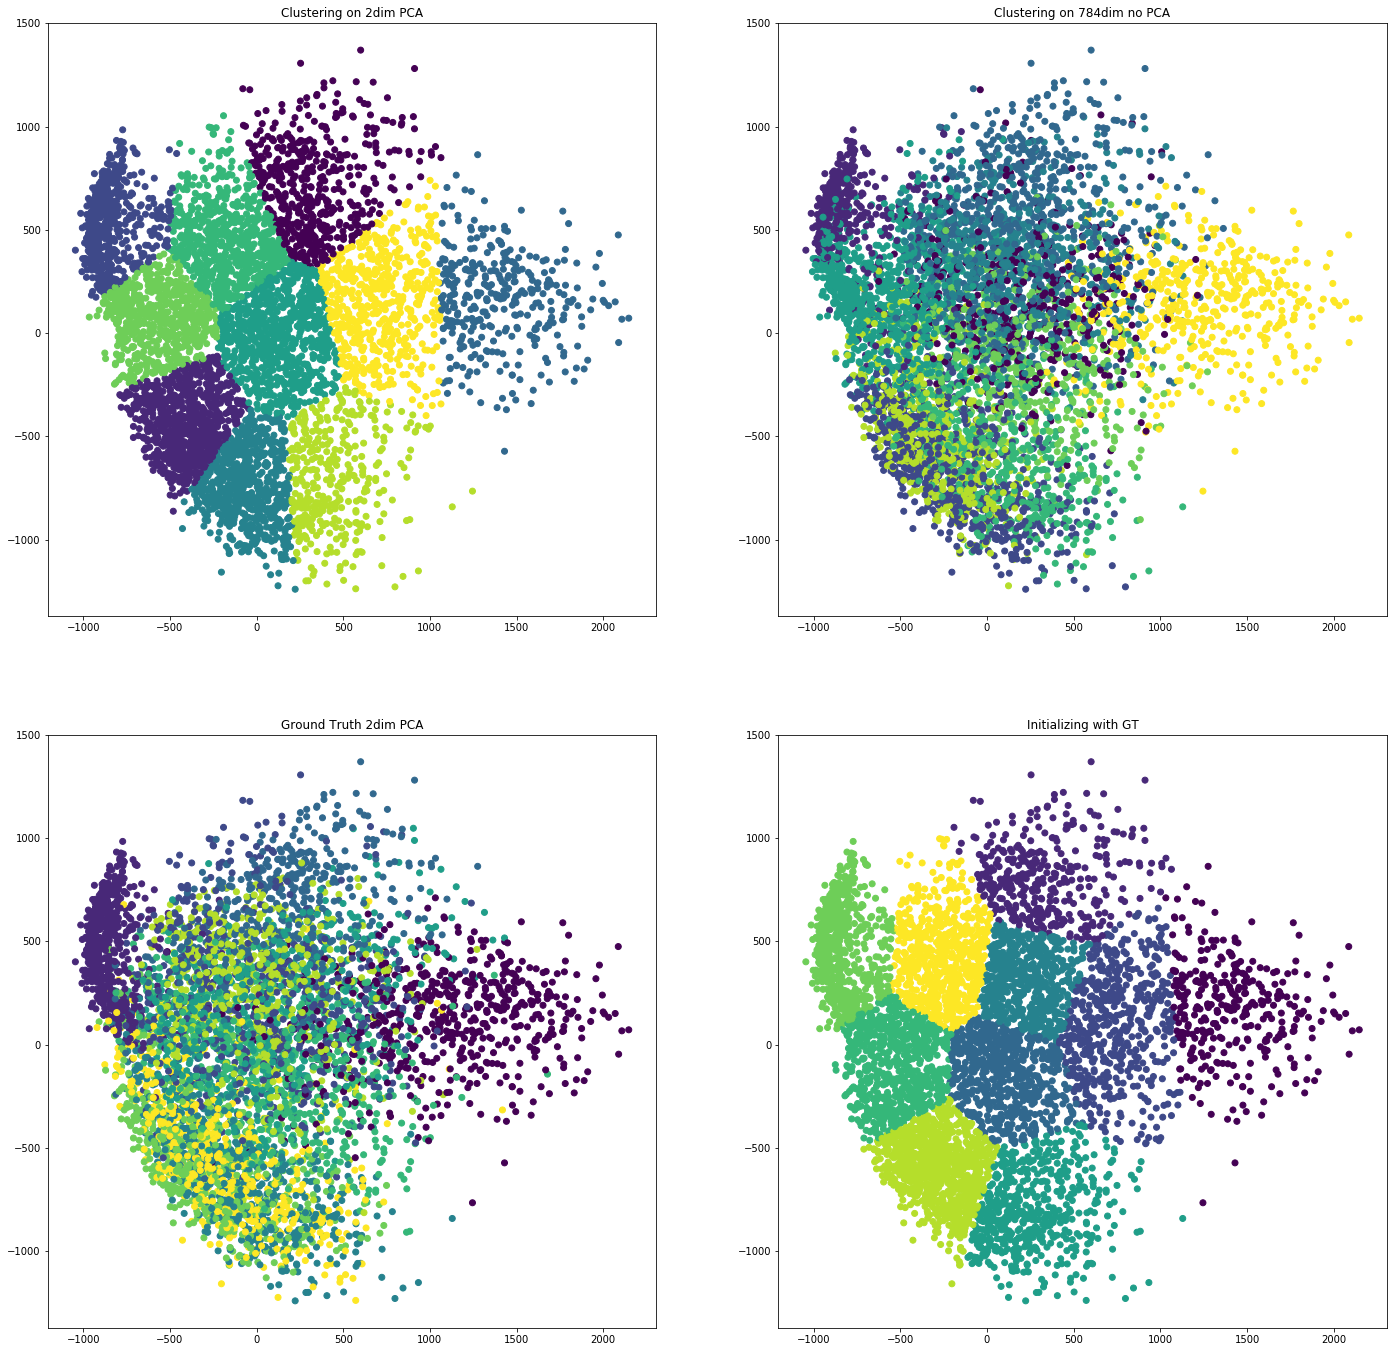

In [41]:
fig